In [ ]:
# First, we need to install the libraries that we need

# Notes on the libraries
# Numpy is Python's array data structure
# Pandas are Python's main data structure, they are like excel spreadsheet
# Openpyxl is the file that allows Python to open and read excel files
# Statsmodels contains Python's built-in machine learning models
# Scikit-learn is a machine learning and AI library
# Seaborn and matplot lib are used to create graphs
# We use !pip to install libraries
# The ! is the equivalent of a terminal command
!pip install pandas
!pip install numpy
!pip install openpyxl
!pip install statsmodels
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [ ]:
# Instantiate the libraries and read the file
# Logistic regreession requires all numbers
# We will use Encoding to convert from
# a category (e.g., Gender) to a number
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# Load the CSV file
filepath = '/content/car_sales (2).csv'
df = pd.read_csv(filepath)

# Display basic information
print("Size of the dataset:", df.shape)
print("First 5 records:")
print(df.head())
print("\nColumns and their data types:")
print(df.dtypes)

Size of the dataset: (23906, 16)
First 5 records:
         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male         1350.0   
1  C_CND_000002  1/2/2022           Gia   Male       148000.0   
2  C_CND_000003  1/2/2022        Gianna   Male       103500.0   
3  C_CND_000004  1/2/2022       Giselle   Male         1350.0   
4  C_CND_000005  1/2/2022         Grace   Male       146500.0   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Ove

In [ ]:
# Ensure the 'Date' column is correctly parsed as datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

# Check for any rows where 'Date' couldn't be parsed
if df['Date'].isnull().any():
    print("Warning: Some dates could not be parsed and have been set to NaT (Not a Time).")
    print(df[df['Date'].isnull()])

# Extract month and quarter information after successful conversion
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Group by Month, Quarter, Model, Body Style, and Dealer Region to analyze trends
seasonal_trends = df.groupby(['Month', 'Quarter', 'Model', 'Body Style', 'Dealer_Region'])['Price ($)'].count().reset_index(name='Sales')

# Display grouped data for verification
print("Seasonal trends grouped by month and region:")
print(seasonal_trends.head())


Seasonal trends grouped by month and region:
   Month  Quarter   Model Body Style Dealer_Region  Sales
0      1        1   3-Sep      Sedan        Aurora      1
1      1        1   3-Sep      Sedan        Austin      1
2      1        1   3-Sep      Sedan         Pasco      1
3      1        1   3-Sep      Sedan    Scottsdale      3
4      1        1  3000GT      Sedan        Aurora      2


<ipython-input-22-cda530afaaf2>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=filtered_data, x='Month', y='Sales', hue='Model', ci=None)


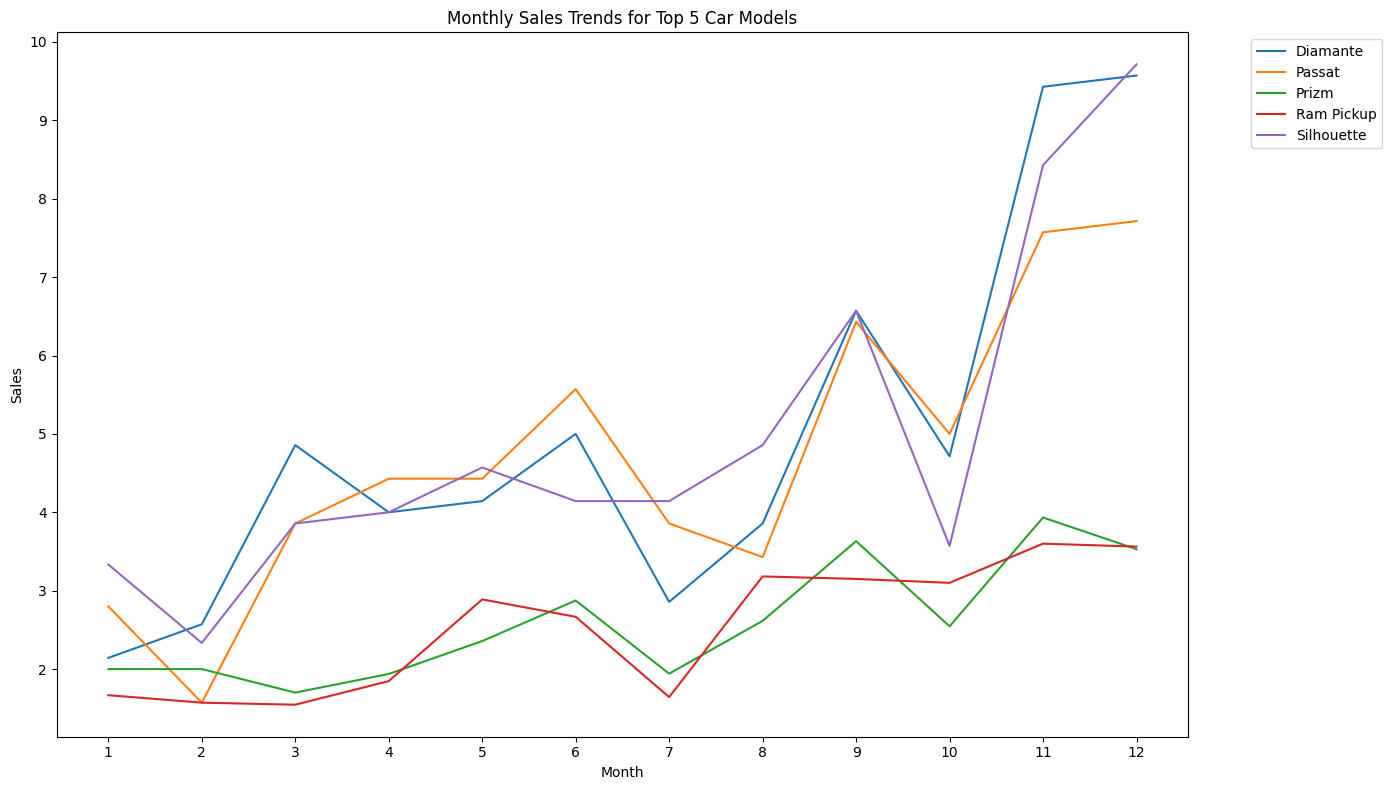

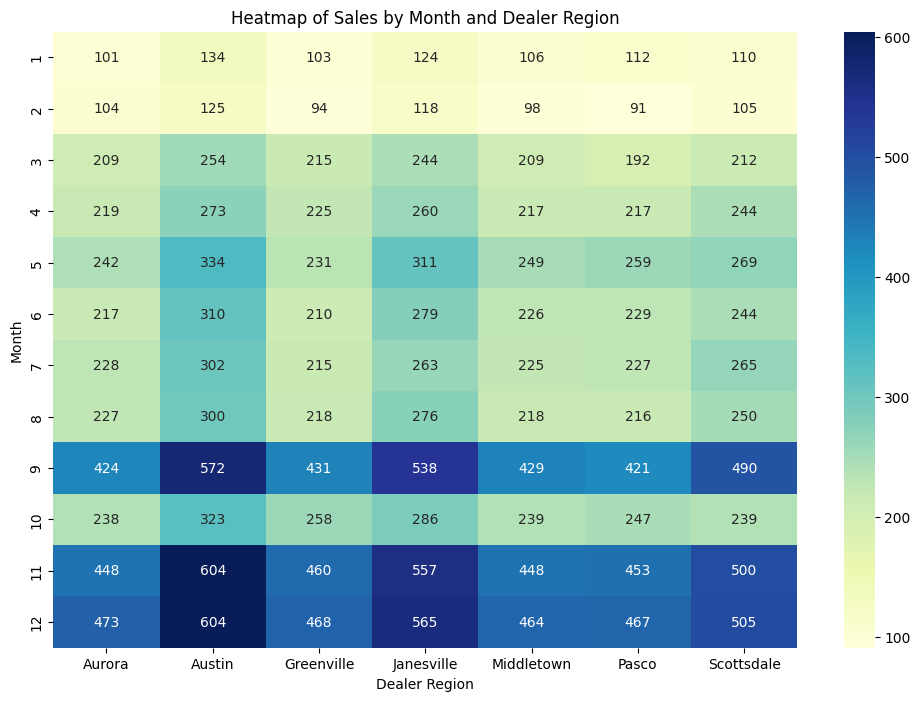

In [ ]:
# Identify the top 5 models by total sales
top_models = seasonal_trends.groupby('Model')['Sales'].sum().nlargest(5).index

# Filter data for the top models
filtered_data = seasonal_trends[seasonal_trends['Model'].isin(top_models)]

# Generate the line chart without the confidence interval shading
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_data, x='Month', y='Sales', hue='Model', ci=None)
plt.title('Monthly Sales Trends for Top 5 Car Models')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(1, 13))  # Display all months from 1 to 12
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
seasonal_trends = df.groupby(['Month', 'Quarter', 'Model', 'Body Style', 'Dealer_Region'])['Price ($)'].count().reset_index(name='Sales')

# Aggregate sales to remove duplicates by summing them
heatmap_data = seasonal_trends.groupby(['Month', 'Dealer_Region'])['Sales'].sum().unstack()

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Heatmap of Sales by Month and Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Month')
plt.show()


In [55]:
# Re-run the Enhanced Stacking Classifier with the new features
stacking_clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Model Accuracy with Interaction Features:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


[LightGBM] [Info] Number of positive: 8362, number of negative: 8372
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 495
[LightGBM] [Info] Number of data points in the train set: 16734, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499701 -> initscore=-0.001195
[LightGBM] [Info] Start training from score -0.001195
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5017 - loss: 1.0628 - val_accuracy: 0.5139 - val_loss: 0.8105 - learning_rate: 0.0010
Epoch 2/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5129 - loss: 0.7873 - val_accuracy: 0.5202 - val_loss: 0.7358 - learning_rate: 0.0010
Epoch 3/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5257 - loss: 0.7245 - val_accuracy: 0.5085 - val_loss: 0.7077 - learning_rate: 0.0010
Epoch 4/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5338 - loss: 0.7047 - val_accuracy: 0.5163 - val_loss: 0.6983 - learning_rate: 0.0010
Epoch 5/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5261 - loss: 0.6972 - val_accuracy: 0.5282 - val_loss: 0.6923 - learning_rate: 0.0010
Epoch 6/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5209 - loss: 0.6940 - val_accuracy: 0.5199 - val_loss: 0.6914 - learning_rate: 0.0010
Epoch 7/100
419/419 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5195 - loss: 0.

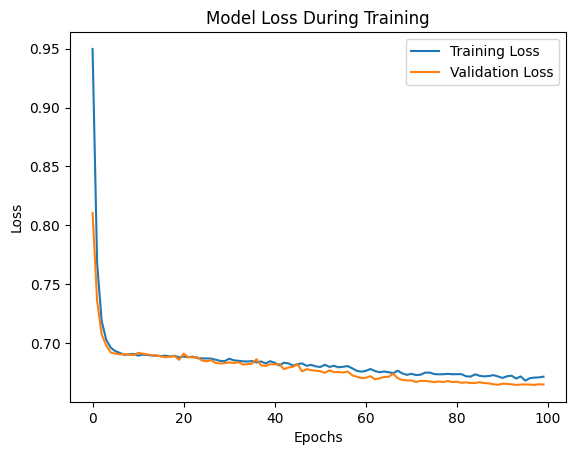

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Build an enhanced neural network model with advanced features
nn_model = Sequential([
    Dense(256, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer='l2'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with an adaptive optimizer
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Implement learning rate scheduling
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                       callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True), reduce_lr])

# Evaluate the model
nn_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)[1]
print("Enhanced Neural Network Model Accuracy:", nn_accuracy)

# Predict and evaluate
y_pred = (nn_model.predict(X_test) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [66]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the individual models
logreg = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, eval_metric='logloss')

# Combine the models into a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', logreg),
    ('rf', rf),
    ('xgb', xgb)
], voting='soft')

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Ensemble Voting Classifier Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


Ensemble Voting Classifier Accuracy: 0.6486335750139431

Confusion Matrix:
 [[2398 1297]
 [1223 2254]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.65      0.66      3695
           1       0.63      0.65      0.64      3477

    accuracy                           0.65      7172
   macro avg       0.65      0.65      0.65      7172
weighted avg       0.65      0.65      0.65      7172



<ipython-input-78-45863ac68d9e>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


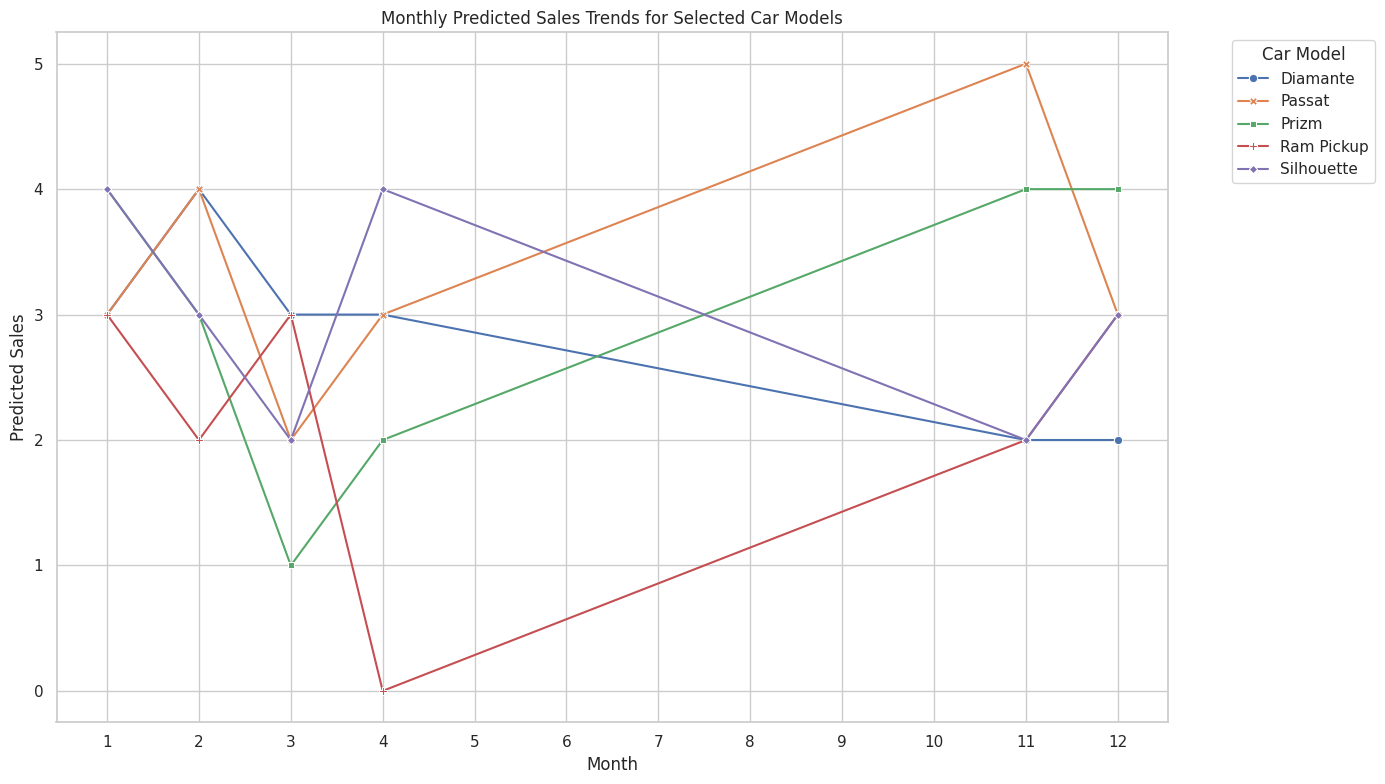

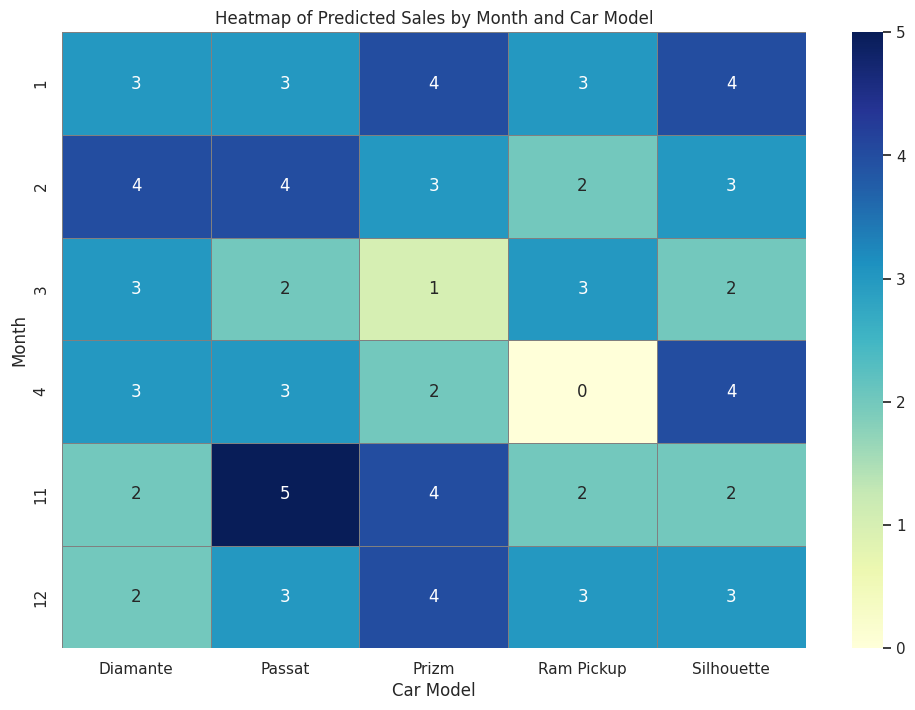

In [78]:
# Generate the line chart with better visualization options
plt.figure(figsize=(14, 8))

# Plot with markers and adjusted line styles
sns.lineplot(
    data=filtered_data,
    x='Month',
    y='Predicted Sales',
    hue='Model',
    style='Model',
    markers=True,
    dashes=False,
    ci=None
)

plt.title('Monthly Predicted Sales Trends for Selected Car Models')
plt.xlabel('Month')
plt.ylabel('Predicted Sales')
plt.xticks(range(1, 13))  # Display all months from 1 to 12
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Car Model')
plt.grid(visible=True)
plt.tight_layout()
plt.show()

# Generate the heatmap with adjusted color palette and annotations
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    annot=True,
    fmt=".0f",
    linewidths=.5,
    linecolor='gray'
)

plt.title('Heatmap of Predicted Sales by Month and Car Model')
plt.xlabel('Car Model')
plt.ylabel('Month')
plt.show()
